<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант №4

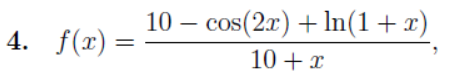

1. Реализация функции lagrange

In [ ]:
import math
import matplotlib.pyplot as plt


def main_function(x: float) -> float:
    return (10 - math.cos(2 * x) + math.log(x + 1)) / (10 + x)

def l_polynomial(cur_x: float, array_x: list[float], i: int) -> float:
    value = 1
    for j in range(len(array_x)):
        if j != i:
            value *= (cur_x - array_x[j]) / (array_x[i] - array_x[j])
    return value

def lagrange(cur_x: float, array_x: list[float]) -> float:
    value = 0
    for i in range(len(array_x)):
        value += main_function(array_x[i]) * l_polynomial(cur_x, array_x, i)
    return value


2. Исследование качества интерполяции при N узлах

Получение тестовой таблично-заданной фукнкцию $y_i$ на основе фукнции $f(x)$  на отрезке  $x∈[a,b]$

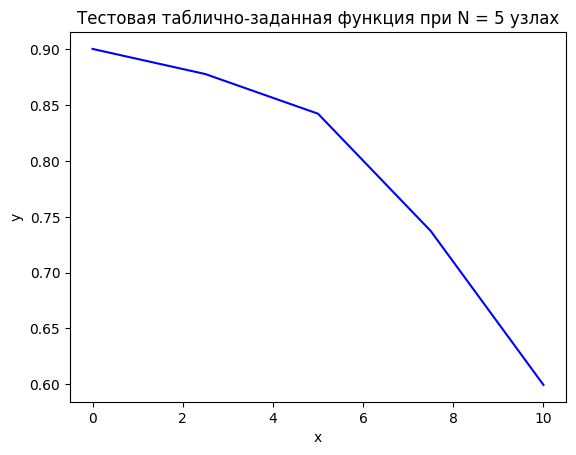

In [ ]:
N = 5 #5, 10, 50, 100, 150

x_array = [i * 10 / (N - 1) for i in range(N)]
y_array = [lagrange(x_cur, x_array) for x_cur in x_array]


plt.plot(x_array, y_array, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Тестовая таблично-заданная функция при N = {N} узлах")
plt.show()

Получение интерполяции таблично-заданной функции в точках $x^*∈[a,b]$,


находящиеся на серединах интерполяционных узлов

In [ ]:
x_middle_array = [(x_array[i] + x_array[i + 1]) / 2 for i in range(N - 1)]
y_middle_array = [lagrange(x_cur, x_array) for x_cur in x_middle_array]

Вспомогательная функция для "слияния" списков

In [ ]:
def merge_alternate(array: list[float], middle_array: list[float]) -> list[float]:
    merged = []
    for i in range(len(middle_array)):
        merged.append(array[i])
        merged.append(middle_array[i])
    merged.append(array[-1])
    return merged

:Изображение значения таблично-заданной функции и интеполированных значений на одном графике

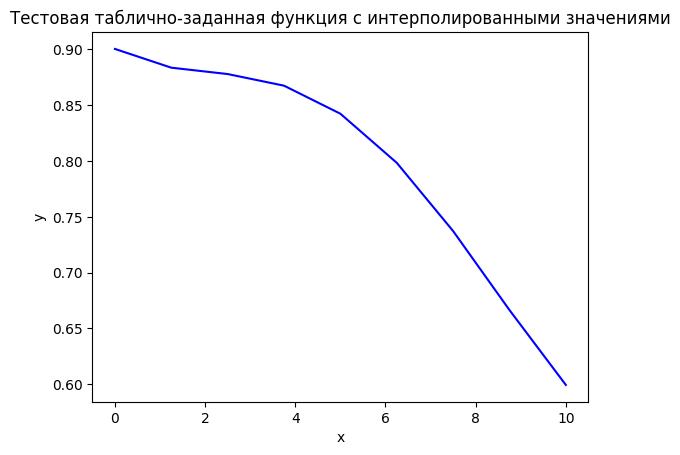

In [ ]:
plt.plot(merge_alternate(x_array, x_middle_array), merge_alternate(y_array, y_middle_array), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Тестовая таблично-заданная функция с интерполированными значениями")
plt.show()

Нахождение максимальной погрешности интеполяции в точках $x^*$, сравнивая интеполированные значения с соответствующими значениями функции $f(x)$.

In [ ]:
max_error = float("-inf")

for i in range(len(x_middle_array)):
  max_error = max(max_error, abs(y_middle_array[i] - main_function(x_middle_array[i])))

print(max_error)

0.1489639968723181


3. Построение в логарифмическом масштабе графика зависимости максимальной погрешности интерполяции от количества узлов N в случае равномерной сетки

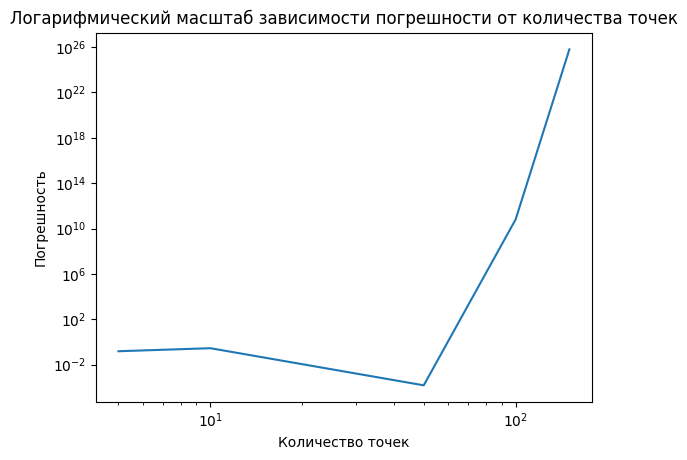

In [ ]:
N_array = [5, 10, 50, 100, 150]
max_error_array = [0.1489639968723181, 0.2763056363356734, 0.00014672428691409056, 63106438170.64503, 6.391121949851142e+25]


plt.loglog(N_array, max_error_array)
plt.xlabel("Количество точек")
plt.ylabel("Погрешность")
plt.title("Логарифмический масштаб зависимости погрешности от количества точек")
plt.show()

4. Интерполяционная сетка в узлах Чебышева

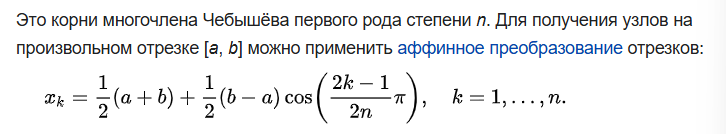



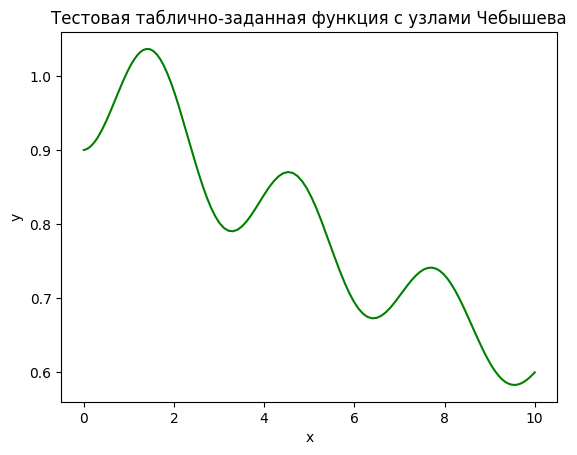

In [ ]:
a = 0
b = 10
N = 150 #5, 10, 50, 100, 150
x_array_cheb = [(a + b)/2 + (b - a)/2 * math.cos((2 * i - 1) / (2 * N) * math.pi) for i in range(1, N + 1)]
y_array_cheb = [lagrange(x_cur, x_array_cheb) for x_cur in x_array_cheb]


plt.plot(x_array_cheb, y_array_cheb, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Тестовая таблично-заданная функция c узлами Чебышева")
plt.show()

Получение интерполяции таблично-заданной функции в точках $x^*∈[a,b]$,


находящиеся на серединах интерполяционных узлов

In [ ]:
x_middle_array_cheb = [(x_array_cheb[i] + x_array_cheb[i + 1]) / 2 for i in range(N - 1)]
y_middle_array_cheb = [lagrange(x_cur, x_array_cheb) for x_cur in x_middle_array_cheb]

Изображение значения таблично-заданной функции и интеполированных значений Чебышева на одном графике

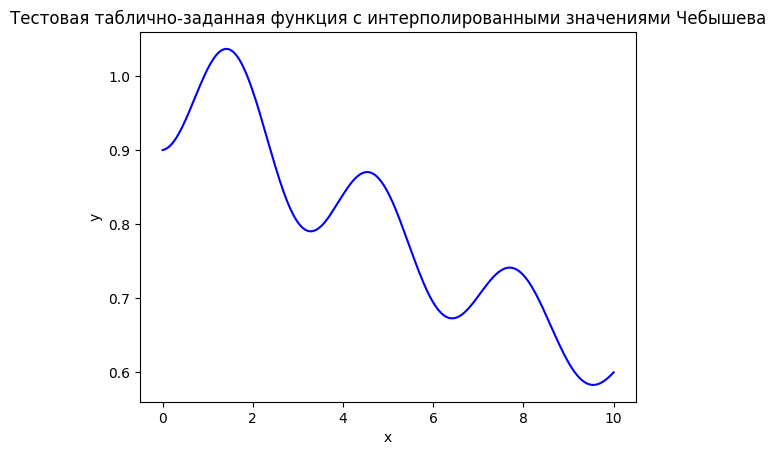

In [ ]:
plt.plot(merge_alternate(x_array_cheb, x_middle_array_cheb), merge_alternate(y_array_cheb, y_middle_array_cheb), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Тестовая таблично-заданная функция с интерполированными значениями Чебышева")
plt.show()

Нахождение максимальной погрешности интеполяции в точках  x∗ , сравнивая интеполированные значения с соответствующими значениями функции  f(x) .

In [ ]:
max_error_cheb = float("-inf")

for i in range(len(x_middle_array)):
  max_error_cheb = max(max_error_cheb, abs(y_middle_array_cheb[i] - main_function(x_middle_array_cheb[i])))

print(max_error_cheb)

1.3322676295501878e-15


Построение в логарифмическом масштабе графика зависимости максимальной погрешности интерполяции от количества узлов N в случае равномерной сетки

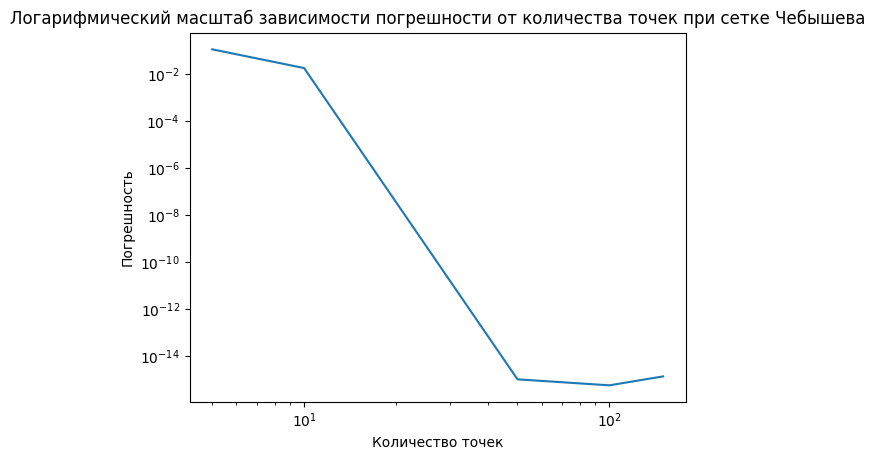

In [ ]:
N_array_cheb = [5, 10, 50, 100, 150]
max_error_array_cheb = [0.11464274575168154, 0.01819574612383923, 9.992007221626409e-16, 5.551115123125783e-16, 1.3322676295501878e-15]


plt.loglog(N_array_cheb, max_error_array_cheb)
plt.xlabel("Количество точек")
plt.ylabel("Погрешность")
plt.title("Логарифмический масштаб зависимости погрешности от количества точек при сетке Чебышева")
plt.show()

Вывод: при равномерной интерполяции при большом увеличении количества точек при заданном отрезке увеличивается разброс - эффект Рунге, при интерполяции сеткой Чебышева происходит спад погрешности